In [1]:
from pathlib import Path
from tqdm import tqdm_notebook

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import torch

import fastai
from fastai.text import *

In [2]:
DATA_PATH = Path('../data')
tqdm_notebook().pandas()

In [3]:
text_cols = ['title', 'text']

In [40]:
train_df = pd.read_csv(DATA_PATH/'train.csv').fillna(' ')
valid_df = pd.read_csv(DATA_PATH/'valid.csv').fillna(' ')
test_df = pd.read_csv(DATA_PATH/'test.csv', index_col=0).fillna(' ')
unlabeled_df = pd.read_csv(DATA_PATH/'unlabeled.csv', index_col=0).fillna(' ')

full_unlabeled_df = pd.concat([train_df['text'], valid_df['text'], test_df['text'], unlabeled_df['text']], 
                              axis=0, ignore_index=True)
full_unlabeled_df.to_csv(DATA_PATH/'full_unlabeled.csv', index=False, header=True)

In [41]:
full_train_df = pd.concat([train_df[['text', 'label']], valid_df[['text', 'label']]], axis=0, ignore_index=True)
full_train_df.to_csv(DATA_PATH/'full_train.csv', index=False, header=True)

test_df['text'].to_csv(DATA_PATH/'full_test.csv', index=False, header=True)

In [42]:
data_lm = TextLMDataBunch.from_csv(DATA_PATH, 'full_unlabeled.csv', text_cols='text', 
                                   bs=16, min_freq=50, valid_pct=0.1)
data_lm.save(DATA_PATH/'data_lm_export.pkl')

In [8]:
data_lm = load_data(DATA_PATH, 'data_lm_export.pkl', bs=16)

In [43]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3).clip_grad(10)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.26E-02


0.012589254117941666

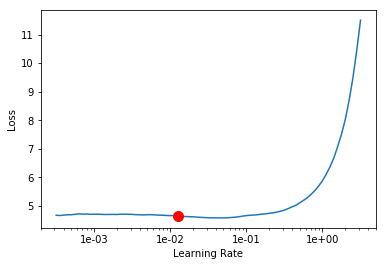

In [44]:
learn.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn.recorder.plot(suggestion=True)

best_lm_lr = learn.recorder.min_grad_lr
best_lm_lr

In [ ]:
learn.fit_one_cycle(1, best_lm_lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time


In [13]:
learn.save('lm_freezed_2')
learn.save_encoder('lm_enc_freezed_2')

In [14]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 7.94E-04


0.0007943282347242812

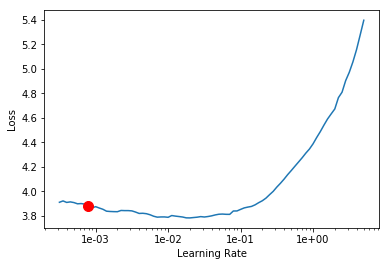

In [15]:
learn.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn.recorder.plot(suggestion=True)

best_lm_lr = learn.recorder.min_grad_lr
best_lm_lr

In [16]:
learn.fit_one_cycle(1, best_lm_lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.517920,3.551916,0.440424,06:12


In [17]:
learn.save('lm_unfreezed_2')
learn.save_encoder('lm_enc_unfreezed_2')

In [7]:
data_clas = load_data(DATA_PATH, 'data_clas_export.pkl', bs=16)

In [8]:
learn_clas = text_classifier_learner(data_clas, drop_mult=0.3, arch=AWD_LSTM)
learn_clas.load_encoder('lm_enc_unfreezed_2')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-04


0.000316227766016838

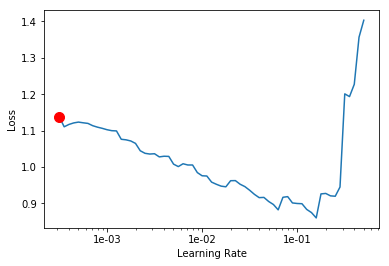

In [22]:
learn_clas.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn_clas.recorder.plot(suggestion=True)

best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

In [23]:
learn_clas.fit_one_cycle(1, best_clf_lr, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.665471,0.475991,0.836763,00:20


In [24]:
learn_clas.save('clf_freezed_2')

In [25]:
learn_clas.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-04


0.000316227766016838

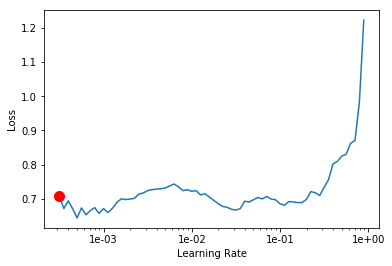

In [26]:
learn_clas.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn_clas.recorder.plot(suggestion=True)

best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

In [27]:
learn_clas.fit_one_cycle(1, slice(best_clf_lr/2.6**4, best_clf_lr), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.539645,0.405095,0.847669,00:25


In [28]:
learn_clas.save('clf_unfreezed_2_2')

In [11]:
learn_clas = learn_clas.load('clf_unfreezed_2_2')

In [12]:
learn_clas.freeze_to(-3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-03


0.0031622776601683794

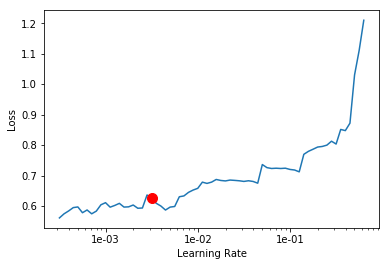

In [13]:
learn_clas.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn_clas.recorder.plot(suggestion=True)

best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

In [14]:
learn_clas.fit_one_cycle(1, slice(best_clf_lr/2.6**4, best_clf_lr), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.453077,0.371985,0.846086,00:39


In [15]:
learn_clas.save('clf_unfreezed_3_2')

In [9]:
learn_clas = learn_clas.load('clf_unfreezed_3_2')

In [10]:
learn_clas.freeze_to(-4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-04


0.000316227766016838

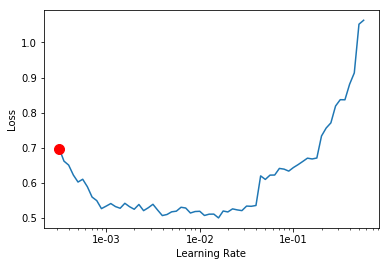

In [11]:
learn_clas.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn_clas.recorder.plot(suggestion=True)

best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

In [12]:
learn_clas.fit_one_cycle(1, slice(best_clf_lr/2.6**4, best_clf_lr), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.483514,0.358196,0.853650,02:31


In [13]:
learn_clas.save('clf_unfreezed_4_2')

In [15]:
learn_clas.freeze_to(-5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.16E-04


0.000316227766016838

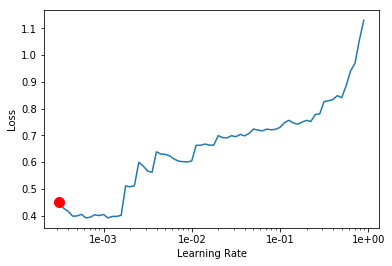

In [16]:
learn_clas.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn_clas.recorder.plot(suggestion=True)

best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

In [17]:
learn_clas.fit_one_cycle(1, slice(best_clf_lr/2.6**4, best_clf_lr), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.468416,0.348606,0.857696,02:41


In [18]:
learn_clas.save('clf_unfreezed_5_2')

In [19]:
learn_clas.freeze_to(-6)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.47E-04


0.00044668359215096327

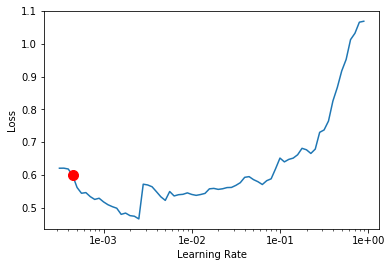

In [20]:
learn_clas.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn_clas.recorder.plot(suggestion=True)

best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

In [21]:
learn_clas.fit_one_cycle(1, slice(best_clf_lr/2.6**4, best_clf_lr), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.435243,0.343938,0.857520,02:43


In [22]:
learn_clas.save('clf_unfreezed_6_2')

In [25]:
learn_clas.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.01E-04


0.0005011872336272724

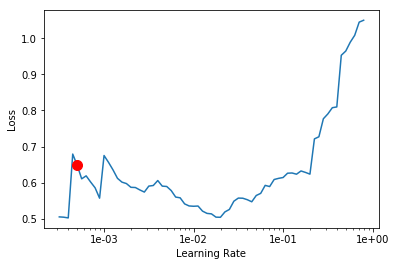

In [26]:
learn_clas.lr_find(start_lr = slice(10e-7, 10e-5), end_lr=slice(0.1, 10))
learn_clas.recorder.plot(suggestion=True)

best_clf_lr = learn_clas.recorder.min_grad_lr
best_clf_lr

In [27]:
learn_clas.fit_one_cycle(1, slice(best_clf_lr/2.6**4, best_clf_lr), moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.425316,0.356288,0.857168,02:42


In [28]:
learn_clas.save('clf_unfreezed_all_2')

In [29]:
learn_clas.show_results()

text,target,prediction
xxbos xxmaj sections xxmaj shows xxmaj live yahoo!-abc xxmaj news xxmaj network | © 2017 xxup abc xxmaj news xxmaj internet xxmaj ventures . xxmaj all rights reserved . xxup abc xxmaj news xxmaj video xxmaj shows xxmaj patient xxmaj playing xxmaj guitar xxmaj during xxmaj brain xxmaj surgery in xxmaj brazil xxmaj amazing xxmaj video xxmaj shows xxmaj patient xxmaj playing xxmaj guitar xxmaj during xxmaj brain xxmaj surgery,news,news
xxbos xxmaj sections xxmaj shows xxmaj live yahoo!-abc xxmaj news xxmaj network | © 2017 xxup abc xxmaj news xxmaj internet xxmaj ventures . xxmaj all rights reserved . xxup abc xxmaj news xxmaj passengers on xxmaj diverted xxmaj flight xxmaj stuck xxmaj almost 24 xxmaj hours in xxmaj canada xxmaj passengers on xxmaj diverted xxmaj flight xxmaj stuck xxmaj almost 24 xxmaj hours in xxmaj canada + xxmaj dad,news,news
"xxbos xxmaj sections xxmaj shows xxmaj live yahoo!-abc xxmaj news xxmaj network | © 2017 xxup abc xxmaj news xxmaj internet xxmaj ventures . xxmaj all rights reserved . xxup abc xxmaj news xxmaj police ' xxmaj do n't xxmaj know ' xxmaj where xxmaj escaped xxmaj killers xxmaj have xxmaj gone , xxmaj new xxmaj york xxmaj governor xxmaj says xxmaj police ' xxmaj do n't xxmaj know '",clickbait,news
"xxbos xxmaj sections xxmaj shows xxmaj live yahoo!-abc xxmaj news xxmaj network | © 2017 xxup abc xxmaj news xxmaj internet xxmaj ventures . xxmaj all rights reserved . xxup abc xxmaj news xxmaj james xxmaj holmes xxmaj took xxmaj first xxmaj love to xxmaj horror xxmaj movie xxmaj fest , xxmaj she xxmaj testifies in xxmaj aurora xxmaj trial xxmaj james xxmaj holmes xxmaj took xxmaj first xxmaj love",news,news
xxbos xxmaj sections xxmaj shows xxmaj live yahoo!-abc xxmaj news xxmaj network | © 2017 xxup abc xxmaj news xxmaj internet xxmaj ventures . xxmaj all rights reserved . xxup abc xxmaj news xxmaj transgender xxmaj teen xxmaj sues xxmaj virginia xxmaj school xxmaj board for xxmaj allegedly xxmaj not xxmaj allowing xxmaj him to xxmaj use xxmaj boys xxmaj room xxmaj transgender xxmaj teen xxmaj sues xxmaj school xxmaj,clickbait,news


In [40]:
test_preds = []

for batch in tqdm_notebook(learn_clas.data.test_dl):
    test_preds.append(learn_clas.pred_batch(batch))
    
len(test_preds)

353

In [67]:
test_pred_df = pd.DataFrame(torch.cat(test_preds), columns=['clickbait', 'news', 'other'])
ulmfit_preds = pd.Series(np.argmax(test_pred_df.values, axis=1),
                        name='label').map({0: 'clickbait', 1: 'news', 2: 'other'})

In [48]:
ulmfit_preds.to_csv('ulmfit_predictions_title.csv', index_label='id', header=True)

In [49]:
!head 'ulmfit_predictions_title.csv'

id,label
0,news
1,news
2,news
3,news
4,news
5,news
6,news
7,news
8,news


In [50]:
!wc -l ulmfit_predictions_title.csv

5649 ulmfit_predictions_title.csv


In [42]:
!kaggle competitions submit -c dlinnlp-spring-2019-clf -f ulmfit_predictions_title.csv -m "ULMFiT Baseline"

100%|██████████████████████████████████████| 56.9k/56.9k [00:05<00:00, 11.3kB/s]
Successfully submitted to DL in NLP Spring 2019. Classification